In [64]:
import numpy as np
import pandas as pd
from IPython.display import Image

# Reshaping and pivot tables

## Reshaping by pivoting DataFrame objects

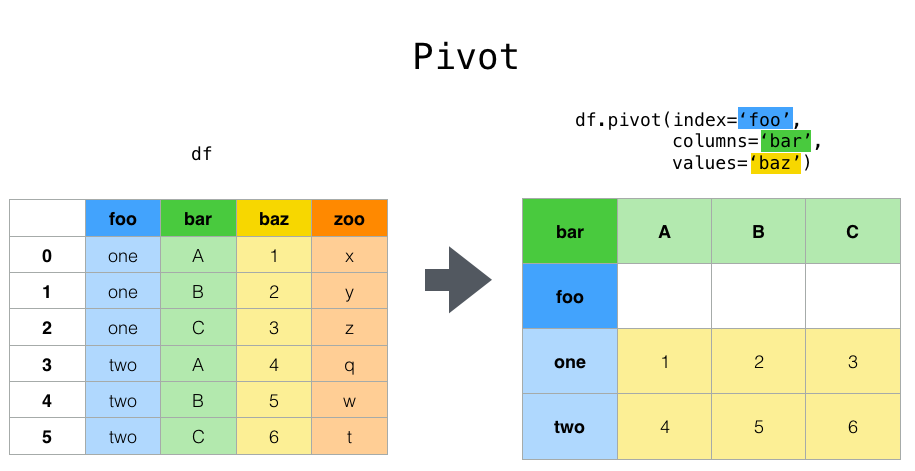

In [65]:
Image("reshaping_pivot.png")

In [27]:
import pandas._testing as tm

tm.N = 3

def unpivot(frame):
    N, K = frame.shape
    data = {'value': frame.to_numpy().ravel('F'),
            'variable': np.asarray(frame.columns).repeat(N),
            'date': np.tile(np.asarray(frame.index), K)}
    return pd.DataFrame(data, columns=['date', 'variable', 'value'])

In [28]:
tm.makeTimeDataFrame()

,A,B,C,D
2000-01-03,-0.726406,-0.269947,1.069418,-1.257023
2000-01-04,0.322774,0.483002,1.066637,-1.716973
2000-01-05,-1.327772,0.066558,0.981191,0.629585


In [29]:
df = unpivot(tm.makeTimeDataFrame())

In [30]:
df

,date,variable,value
0,2000-01-03,A,1.083828
1,2000-01-04,A,1.153266
2,2000-01-05,A,0.837313
3,2000-01-03,B,-0.885429
4,2000-01-04,B,0.070384
5,2000-01-05,B,-0.262167
6,2000-01-03,C,-0.043855
7,2000-01-04,C,-1.976826
8,2000-01-05,C,-0.309691
9,2000-01-03,D,-0.757762


In [31]:
# df = pd.DataFrame(data={
#    "date": pd.date_range("2000/01/03", periods=12),
#    "variable": sorted(["A", "B", "C", "D"]*3),
#    "value": np.random.randn(12)})
# df

In [32]:
df[df['variable'] == 'A']

,date,variable,value
0,2000-01-03,A,1.083828
1,2000-01-04,A,1.153266
2,2000-01-05,A,0.837313


In [33]:
df.pivot(index='date', columns='variable', values='value')

variable,A,B,C,D
date,,,,
2000-01-03,1.083828,-0.885429,-0.043855,-0.757762
2000-01-04,1.153266,0.070384,-1.976826,-1.286874
2000-01-05,0.837313,-0.262167,-0.309691,1.591627


In [37]:
df["value2"] = df["value"] * 2
df

,date,variable,value,value2
0,2000-01-03,A,1.083828,2.167656
1,2000-01-04,A,1.153266,2.306531
2,2000-01-05,A,0.837313,1.674626
3,2000-01-03,B,-0.885429,-1.770857
4,2000-01-04,B,0.070384,0.140768
5,2000-01-05,B,-0.262167,-0.524333
6,2000-01-03,C,-0.043855,-0.087710
7,2000-01-04,C,-1.976826,-3.953653
8,2000-01-05,C,-0.309691,-0.619381
9,2000-01-03,D,-0.757762,-1.515524


In [35]:
pivoted = df.pivot(index='date', columns='variable')
pivoted

value                                  value2            \
variable           A         B         C         D         A         B   
date                                                                     
2000-01-03  1.083828 -0.885429 -0.043855 -0.757762  2.167656 -1.770857   
2000-01-04  1.153266  0.070384 -1.976826 -1.286874  2.306531  0.140768   
2000-01-05  0.837313 -0.262167 -0.309691  1.591627  1.674626 -0.524333   

                                
variable           C         D  
date                            
2000-01-03 -0.087710 -1.515524  
2000-01-04 -3.953653 -2.573747  
2000-01-05 -0.619381  3.183254

In [36]:
pivoted['value2']

variable,A,B,C,D
date,,,,
2000-01-03,2.167656,-1.770857,-0.087710,-1.515524
2000-01-04,2.306531,0.140768,-3.953653,-2.573747
2000-01-05,1.674626,-0.524333,-0.619381,3.183254


In [38]:
pivoted.columns

MultiIndex([( 'value', 'A'),
            ( 'value', 'B'),
            ( 'value', 'C'),
            ( 'value', 'D'),
            ('value2', 'A'),
            ('value2', 'B'),
            ('value2', 'C'),
            ('value2', 'D')],
           names=[None, 'variable'])

## Reshaping by stacking and unstacking

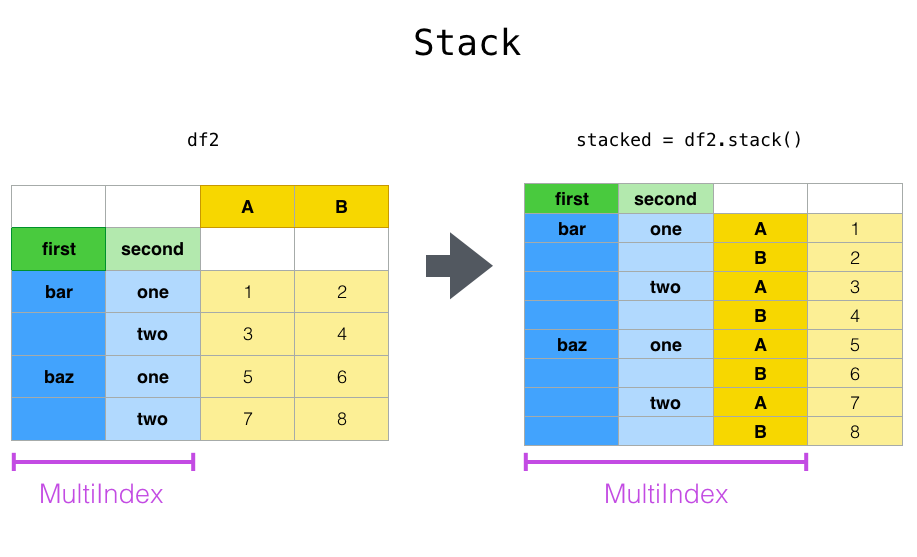

In [67]:
Image("reshaping_stack.png")

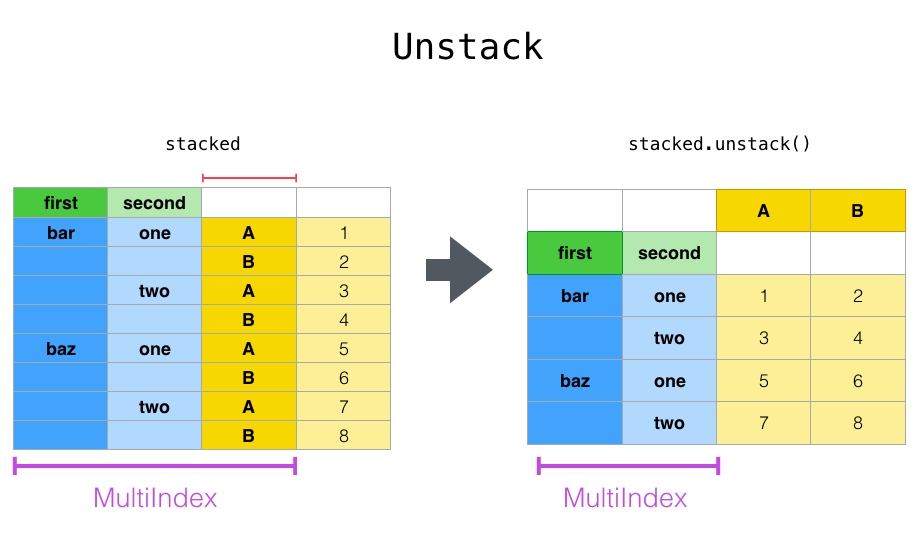

In [68]:
Image("reshaping_unstack.png")

In [39]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [40]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [41]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [43]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -0.148916  2.575441
      two     0.587583  0.563005
baz   one    -0.707178  0.167504
      two     2.476231 -0.916552
foo   one     0.990194 -0.348256
      two     0.148188 -0.861422
qux   one     0.338304 -0.153129
      two    -0.395895  0.253983

In [45]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.148916  2.575441
      two     0.587583  0.563005
baz   one    -0.707178  0.167504
      two     2.476231 -0.916552

In [47]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.148916
               B    2.575441
       two     A    0.587583
               B    0.563005
baz    one     A   -0.707178
               B    0.167504
       two     A    2.476231
               B   -0.916552
dtype: float64

In [48]:
stacked.unstack()

A         B
first second                    
bar   one    -0.148916  2.575441
      two     0.587583  0.563005
baz   one    -0.707178  0.167504
      two     2.476231 -0.916552

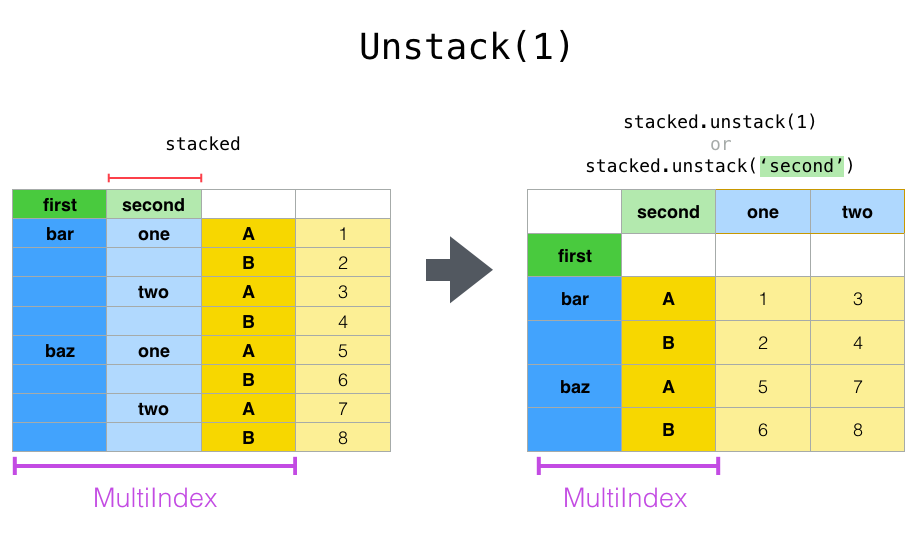

In [69]:
Image("reshaping_unstack_1.png")

In [49]:
stacked.unstack(1)   # stacked.unstack("second")

second        one       two
first                      
bar   A -0.148916  0.587583
      B  2.575441  0.563005
baz   A -0.707178  2.476231
      B  0.167504 -0.916552

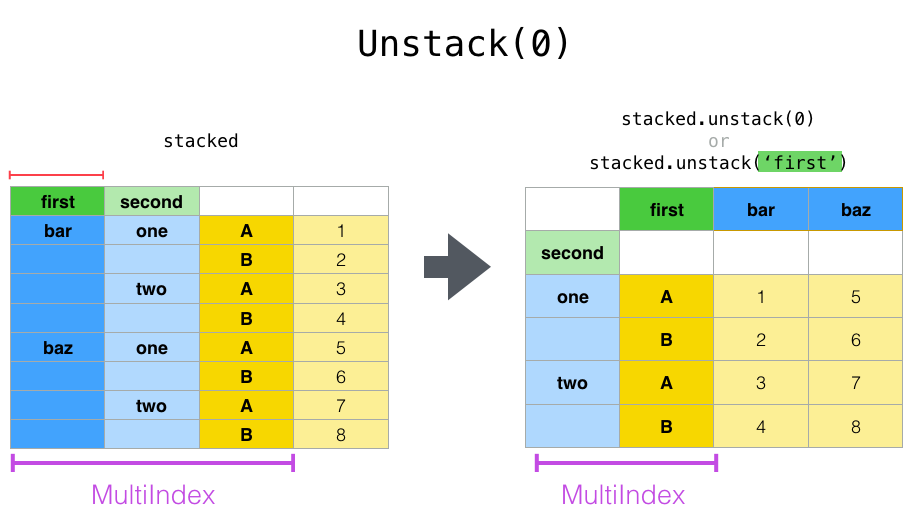

In [70]:
Image("reshaping_unstack_0.png")

In [50]:
stacked.unstack(0)  # stacked.unstack("first")

first          bar       baz
second                      
one    A -0.148916 -0.707178
       B  2.575441  0.167504
two    A  0.587583  2.476231
       B  0.563005 -0.916552

In [51]:
index = pd.MultiIndex.from_product([[2, 1], ['a', 'b']])
index

MultiIndex([(2, 'a'),
            (2, 'b'),
            (1, 'a'),
            (1, 'b')],
           )

In [53]:
df = pd.DataFrame(np.random.randn(4), index=index, columns=['A'])
df

A
2 a  1.267424
  b  0.824388
1 a -0.692291
  b -0.295930

In [55]:
df.unstack().stack()

A
1 a -0.692291
  b -0.295930
2 a  1.267424
  b  0.824388

In [56]:
df.sort_index()

A
1 a -0.692291
  b -0.295930
2 a  1.267424
  b  0.824388

In [54]:
all(df.unstack().stack() == df.sort_index())

True

### Multiple levels

In [58]:
columns = pd.MultiIndex.from_tuples([
    ('A', 'cat', 'long'), ('B', 'cat', 'long'),
    ('A', 'dog', 'short'), ('B', 'dog', 'short')],
    names=['exp', 'animal', 'hair_length'])
columns

MultiIndex([('A', 'cat',  'long'),
            ('B', 'cat',  'long'),
            ('A', 'dog', 'short'),
            ('B', 'dog', 'short')],
           names=['exp', 'animal', 'hair_length'])

In [59]:
df = pd.DataFrame(np.random.randn(4, 4), columns=columns)
df

exp,A,B,A,B
animal,cat,cat,dog,dog
hair_length,long,long,short,short
0,1.821154,-0.177036,-1.289953,-0.308872
1,0.163389,-0.477380,0.778308,0.678426
2,-1.308477,0.305501,0.310018,1.426604
3,-0.721990,-0.988980,-0.860562,-1.662928


In [60]:
df.stack(level=['animal', 'hair_length'])

exp                          A         B
  animal hair_length                    
0 cat    long         1.821154 -0.177036
  dog    short       -1.289953 -0.308872
1 cat    long         0.163389 -0.477380
  dog    short        0.778308  0.678426
2 cat    long        -1.308477  0.305501
  dog    short        0.310018  1.426604
3 cat    long        -0.721990 -0.988980
  dog    short       -0.860562 -1.662928

In [62]:
df.stack(level=[1, 2])

exp                          A         B
  animal hair_length                    
0 cat    long         1.821154 -0.177036
  dog    short       -1.289953 -0.308872
1 cat    long         0.163389 -0.477380
  dog    short        0.778308  0.678426
2 cat    long        -1.308477  0.305501
  dog    short        0.310018  1.426604
3 cat    long        -0.721990 -0.988980
  dog    short       -0.860562 -1.662928

In [63]:
df.stack(level=['animal', 'hair_length']).reset_index()

exp,level_0,animal,hair_length,A,B
0,0,cat,long,1.821154,-0.177036
1,0,dog,short,-1.289953,-0.308872
2,1,cat,long,0.163389,-0.477380
3,1,dog,short,0.778308,0.678426
4,2,cat,long,-1.308477,0.305501
5,2,dog,short,0.310018,1.426604
6,3,cat,long,-0.721990,-0.988980
7,3,dog,short,-0.860562,-1.662928


### Missing data

### With a MultiIndex

## Reshaping by Melt

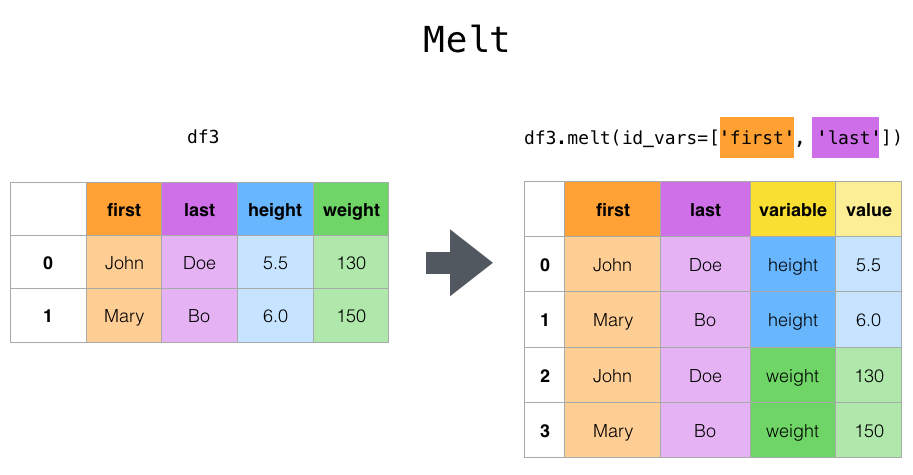

In [71]:
Image("reshaping_melt.png")